### HR Analytics: Mengoptimalkan Sumber Daya Manusia melalui Data

Dalam dunia bisnis yang terus berubah, peran Sumber Daya Manusia (HR) telah berkembang menjadi lebih dari sekadar administrasi dan pengelolaan karyawan. Saat ini, HR memegang peranan strategis yang penting dalam pengambilan keputusan organisasi. Bagaimana HR dapat mengoptimalkan tenaga kerja, meningkatkan produktivitas, dan memastikan kepuasan karyawan? Jawabannya adalah dengan menerapkan HR Analytics.

HR Analytics adalah pendekatan yang memanfaatkan data dan analisis untuk memahami lebih dalam dinamika organisasi, karyawan, dan lingkungan kerja. Ini membantu HR dalam mengidentifikasi pola-pola yang mungkin terlewatkan, memprediksi kebutuhan sumber daya manusia di masa depan, dan mengukur dampak kebijakan dan program HR. Dengan HR Analytics, perusahaan dapat membuat keputusan yang lebih tepat dan terinformasi.

Dalam perjalanan ini, kita akan menjelajahi dunia HR Analytics, memahami bagaimana data dapat digunakan untuk meningkatkan pengelolaan sumber daya manusia, memaksimalkan produktivitas karyawan, dan mencapai tujuan organisasi. Kami akan melihat berbagai metode analisis, teknik visualisasi, dan praktik terbaik dalam HR Analytics untuk membantu Anda meraih keberhasilan dalam pengelolaan sumber daya manusia. Mari kita mulai perjalanan ini menuju pemahaman yang lebih dalam tentang dunia HR Analytics.

Berikut dibawah ini merupakan Exploratory Data Analysis dari kelompok kami Data Wizards mengenai HR Analytics

1. Membaca masing masing data set serta menampilkan 5 sampling data dari setiap data set train dan test

In [35]:
import pandas as pd

# Membaca 2 data set
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')

# Menampilkan masing masing 5 baris pertama dari data frame train dan test
print(df_train.head(5))
print(df_test.head(5))

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM     

Data ini mencakup informasi terkait sumber daya manusia, dengan berbagai variabel seperti pengalaman, pendidikan, jenis kelamin, lokasi, dan lainnya. Terdapat beberapa nilai yang hilang dalam kolom-kolom seperti "gender" dan "company_size". Terdapat juga variasi dalam kolom "last_new_job" yang mencerminkan berapa lama seseorang telah mengganti pekerjaan terakhirnya. Data ini memiliki potensi besar untuk analisis HR yang mendalam. Dengan penerapan HR Analytics, perusahaan dapat memahami tren dalam perekrutan, retensi, dan pengembangan karyawan. Namun, sebelumnya, perlu melakukan pengelolaan data seperti mengisi nilai yang hilang dan memeriksa outlier.

2. Mengetahui nilai kosong

In [2]:
import pandas as pd

df_train = pd.read_csv('aug_train.csv')

missing_values = df_train.isna().sum() / len(df_train)

print(missing_values)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64


Kesimpulan:

1. Terdapat beberapa kolom dengan persentase nilai null yang signifikan. Kolom-kolom ini termasuk "gender," "major_discipline," "company_size," dan "company_type," dengan "company_type" memiliki proporsi nilai null tertinggi sekitar 32%.
2. Sebagian besar kolom lain memiliki persentase nilai null yang relatif rendah, kurang dari 5%.
Untuk mengatasi nilai yang hilang, mungkin diperlukan berbagai strategi, seperti mengisi nilai null dengan 
3. nilai yang sesuai atau menghapus baris yang memiliki nilai null tergantung pada kolomnya.

Penting untuk memahami implikasi dari penghapusan atau pengisian nilai null terhadap analisis data selanjutnya.

Pengelolaan nilai yang hilang dalam data merupakan langkah yang subjektif. Lebih cenderung mempertahankan data kategorikal ketika memungkinkan, mengingat bahwa informasi yang hilang, seperti ukuran perusahaan atau jenis perusahaan, mungkin memiliki relevansi tersendiri. Juga akan membiarkan nilai-nilai yang kosong pada kolom gender, karena di antara nilai-nilai tersebut, 30% memiliki target 1 dalam dataset. Hal ini menunjukkan bahwa data tersebut mungkin memiliki makna penting, meskipun belum sepenuhnya terpecahkan. Catatan dalam dataset ini, target 1 mengindikasikan pencarian perubahan pekerjaan, sementara target 0 menunjukkan ketidakberminatan untuk berpindah pekerjaan.

Selanjutnya mengisi nilai yang kosong

In [16]:
import pandas as pd

# Membaca berkas CSV "aug_train.csv" dan mendefinisikan dataframe "aug_train"
aug_train = pd.read_csv('aug_train.csv')

# Melakukan perubahan pada dataframe "aug_train"
aug_train['last_new_job'] = aug_train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x)
aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment'
aug_train['company_size'] = aug_train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x)

# Mengganti nilai-nilai pengalaman yang ekstrem
aug_train['experience'] = aug_train['experience'].apply(lambda x: '0' if x == '<1' else x)
aug_train['experience'] = aug_train['experience'].apply(lambda x: '20' if x == '>20' else x)

aug_train['company_size'].fillna('0', inplace=True)
aug_train['company_type'].fillna('Unknown', inplace=True)
aug_train['major_discipline'].fillna('Unknown', inplace=True)
aug_train['gender'].fillna('Not provided', inplace=True)

# Menampilkan hasil rata-rata target berdasarkan kategori gender
mean_target_by_gender = aug_train.groupby('gender')['target'].mean()
print(mean_target_by_gender)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6624\2909346758.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment'


gender
Female          0.263328
Male            0.227819
Not provided    0.308119
Other           0.261780
Name: target, dtype: float64


Setelah mengisi nilai yang kosong selanjutnya kita menghapus beberapa baris dengan nilai yang memang tetap kosong dan tidak bisa dirubah

In [78]:
# Menghapus baris dengan nilai-nilai yang hilang (NaN) dari dataframe "aug_train"
aug_train.dropna(inplace=True)

# Menghapus baris dengan nilai-nilai yang hilang (NaN) dari dataframe "aug_test"
aug_test.dropna(inplace=True)

# Menghitung jumlah nilai-nilai yang hilang dalam dataframe "aug_train" setelah penghapusan
missing_values_train = aug_train.isna().sum() / len(aug_train)

# Menampilkan hasil
print("Jumlah nilai-nilai yang hilang dalam aug_train setelah penghapusan:")
print(missing_values_train)


Jumlah nilai-nilai yang hilang dalam aug_train setelah penghapusan:
enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
dtype: float64


3. Summary Statistik

In [3]:
import pandas as pd

# Membaca dataset
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')

# Melihat summary statistik untuk df_train
print("Summary Statistik untuk df_train:")
print(df_train.describe())

# Melihat summary statistik untuk df_test
print("\nSummary Statistik untuk df_test:")
print(df_test.describe())

Summary Statistik untuk df_train:
        enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000

Summary Statistik untuk df_test:
        enrollee_id  city_development_index  training_hours
count   2129.000000             2129.000000     2129.000000
mean   16861.614843                0.824984       64.983091
std     9576.846029                0.125074       60.238660
min        3.000000       

Kesimpulan:

1. Data pelatihan (df_train) terdiri dari 19.158 baris, sedangkan data pengujian (df_test) memiliki 2.129 baris.
City Development Index (CDI) memiliki rata-rata sekitar 0.825, menunjukkan sebagian besar kota memiliki tingkat pembangunan yang cukup tinggi.
2. Total jam pelatihan (training_hours) memiliki variasi yang signifikan, dengan nilai minimum 1 dan maksimum 336 pada data pelatihan, serta minimum 1 dan maksimum 334 pada data pengujian.
3. Target adalah kolom yang akan diprediksi, dengan nilai 1 menunjukkan pencari pekerjaan baru dan nilai 0 menunjukkan yang tidak mencari perubahan pekerjaan.

Namun, perlu diperhatikan bahwa analisis lebih lanjut diperlukan untuk memahami pola korelasi antara fitur dan target, serta antara fitur-fitur tersebut.

In [18]:
# Mengubah kolom "experience" dalam dataframe "aug_train" dan "aug_test" menjadi tipe data integer
aug_train['experience'] = aug_train['experience'].astype(str).astype(int)
aug_test['experience'] = aug_test['experience'].astype(str).astype(int)

# Mengubah kolom "training_hours" dalam dataframe "aug_train" dan "aug_test" menjadi tipe data integer
aug_train['training_hours'] = aug_train['training_hours'].astype(str).astype(int)
aug_test['training_hours'] = aug_test['training_hours'].astype(str).astype(int)


4. Univariate Analysis

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


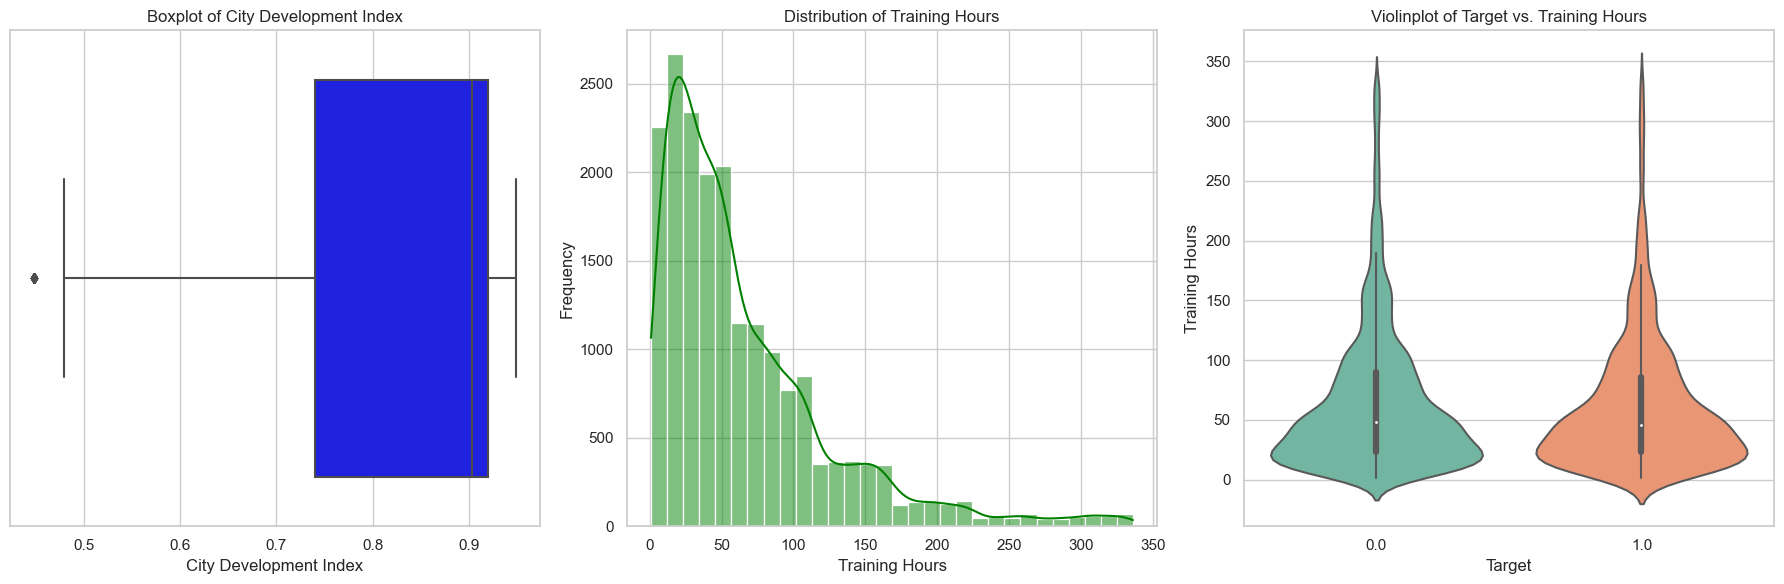

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df_train = pd.read_csv('aug_train.csv')

# Set style untuk seaborn plots
sns.set(style='whitegrid')

# Membuat subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot untuk city_development_index
sns.boxplot(ax=axes[0], x=df_train['city_development_index'], orient='vertical', color='blue')
axes[0].set_title('Boxplot of City Development Index')
axes[0].set_xlabel('City Development Index')
axes[0].set_ylabel('')

# Distplot untuk training_hours
sns.histplot(ax=axes[1], x=df_train['training_hours'], bins=30, kde=True, color='green')
axes[1].set_title('Distribution of Training Hours')
axes[1].set_xlabel('Training Hours')
axes[1].set_ylabel('Frequency')

# Violinplot untuk target
sns.violinplot(ax=axes[2], x=df_train['target'], y=df_train['training_hours'], palette='Set2')
axes[2].set_title('Violinplot of Target vs. Training Hours')
axes[2].set_xlabel('Target')
axes[2].set_ylabel('Training Hours')

# Adjust subplot layout
plt.tight_layout()

# Menampilkan hasil
plt.show()


5. Cek Outliers

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


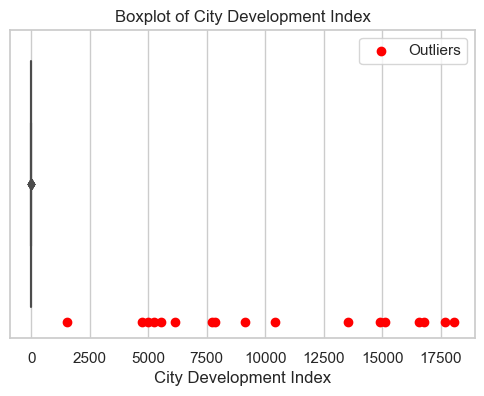

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_train = pd.read_csv('aug_train.csv')

# Calculate the IQR
Q1 = df_train['city_development_index'].quantile(0.25)
Q3 = df_train['city_development_index'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_train[(df_train['city_development_index'] < lower_bound) | (df_train['city_development_index'] > upper_bound)]

# Create a Boxplot
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(ax=ax, x=df_train['city_development_index'], orient='vertical', color='blue')

# Add a red overlay for identified outliers
ax.scatter(x=outliers.index, y=outliers['city_development_index'], color='red', label='Outliers')

ax.set_title('Boxplot of City Development Index')
ax.set_xlabel('City Development Index')
ax.set_ylabel('')
ax.legend()
plt.show()

6. Multivariate Analysis

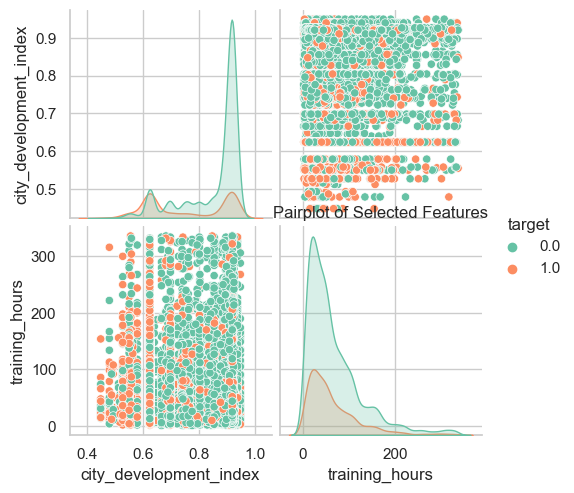

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6412\622066074.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


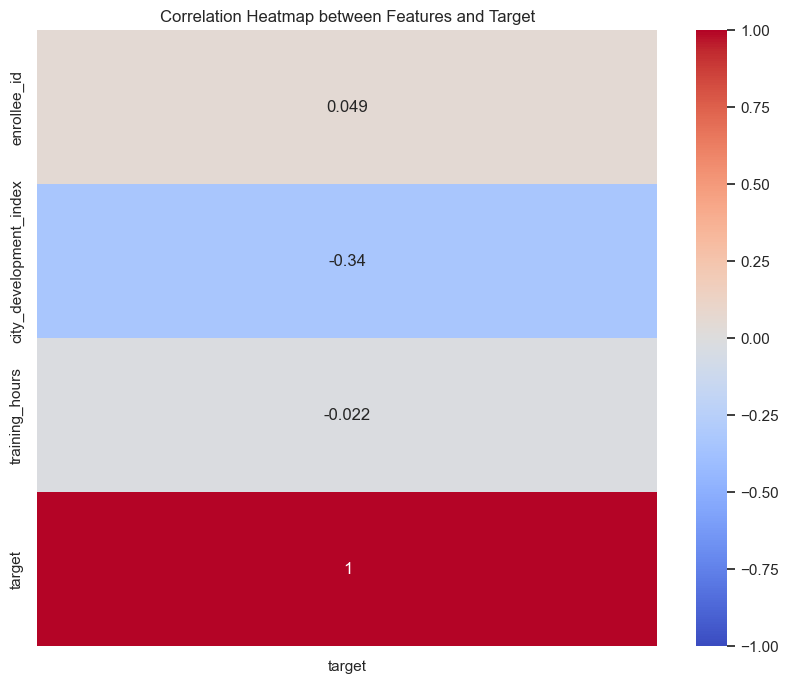

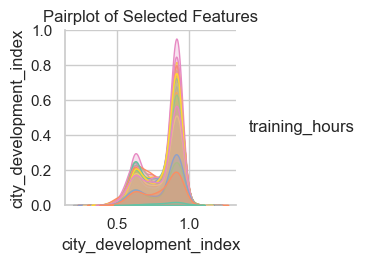

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_train = pd.read_csv('aug_train.csv')

# Define selected features for the pairplot
selected_features = ['city_development_index', 'training_hours', 'target']

# Create pairplot for selected features
sns.pairplot(df_train[selected_features], hue='target', palette='Set2', diag_kind='kde')
plt.title('Pairplot of Selected Features')
plt.show()

# Calculate correlation matrix
corr_matrix = df_train.corr()

# Create a heatmap to visualize correlations between features and target
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['target']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Features and Target')
plt.show()

# Create pairplot for selected features
selected_features = ['city_development_index', 'training_hours']
sns.pairplot(df_train[selected_features], hue='training_hours', palette='Set2', diag_kind='kde')
plt.title('Pairplot of Selected Features')
plt.show()


7. Business Insight

In [19]:
# Menentukan urutan (order) kategori-kategori untuk visualisasi data
ed_order = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']
enroll_order = ['No Enrollment', 'Part time course', 'Full time course']
disc_order = ['STEM', 'Unknown', 'Humanities', 'Other', 'Business Degree', 'Arts', 'No Major']
exp_yrs_order = ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20']
exp_yrs_order_2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
size_order = ['0', '<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order = ['No relevant experience', 'Has relevant experience']
gender_order = ['Male', 'Female', 'Other', 'Not provided']
company_order = ['Pvt Ltd', 'Unknown', 'Funded Startup', 'Public Sector', 'Early Stage Startup', 'NGO', 'Other']

# Digunakan untuk visualisasi data
train_df = aug_train
test_df = aug_test


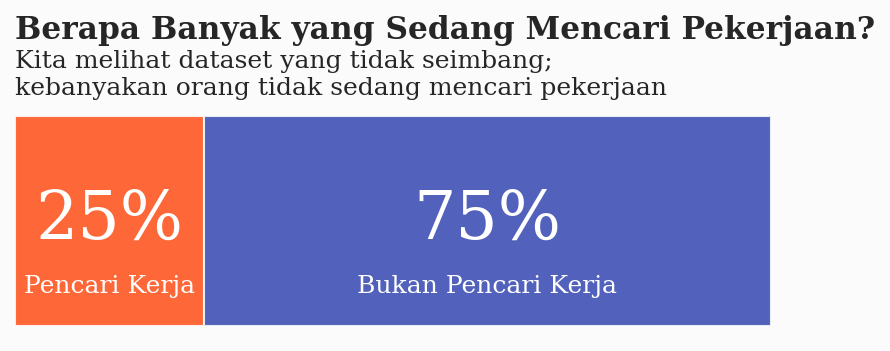

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah target 1.0 (Pencari Kerja) dan 0.0 (Bukan Pencari Kerja)
x = train_df.groupby(['target'])['target'].count()
y = len(train_df)
r = ((x / y)).round(2)
ratio = pd.DataFrame(r).T

# Membuat plot horizontal
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2), dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Membuat bar plot untuk Pencari Kerja (1.0) dan Bukan Pencari Kerja (0.0)
ax.barh(ratio.index, ratio[1.0], color='#ff5722', alpha=0.9, ec=background_color, label='Pencari Kerja')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='#3f51b5', alpha=0.9, ec=background_color, label='Bukan Pencari Kerja')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Menambahkan persentase dan label pada bar
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i), va='center', ha='center',
                fontsize=32, fontweight='light', fontfamily='serif', color='white')
    ax.annotate("Pencari Kerja", xy=(ratio[1.0][i]/2, -0.25), va='center', ha='center',
                fontsize=12, fontweight='light', fontfamily='serif', color='white')

for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i), va='center', ha='center',
                fontsize=32, fontweight='light', fontfamily='serif', color='white')
    ax.annotate("Bukan Pencari Kerja", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25), va='center', ha='center',
                fontsize=12, fontweight='light', fontfamily='serif', color='white')

# Menambahkan judul dan teks keterangan
fig.text(0.125, 1.1, 'Berapa Banyak yang Sedang Mencari Pekerjaan?', fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.125, 0.915, 'Kita melihat dataset yang tidak seimbang;\nkebanyakan orang tidak sedang mencari pekerjaan',
         fontfamily='serif', fontsize=12)

plt.show()


1. Ketidakseimbangan yang Signifikan: Visualisasi ini dengan jelas menyoroti ketidakseimbangan dalam dataset Anda. Hanya sekitar 25% dari populasi dalam dataset yang sedang mencari pekerjaan (Pencari Kerja), sementara 75% sisanya adalah individu yang saat ini bukan pencari pekerjaan. Ini adalah perbedaan signifikan yang mungkin perlu diperhatikan dalam analisis dan pengambilan keputusan.

2. Penekanan Pencari Kerja: Karena mayoritas dataset terdiri dari individu yang bukan pencari pekerjaan, perusahaan atau platform yang memanfaatkan dataset ini harus mempertimbangkan untuk lebih memfokuskan upaya mereka pada pencari kerja. Ini bisa melibatkan strategi rekrutmen yang lebih cermat atau penargetan iklan dan layanan untuk meningkatkan keterlibatan pencari kerja.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6624\3683243875.py:80: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train["city_development_index"], ax=ax3, color=palette[0], shade=True, label="Data Latih")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6624\3683243875.py:81: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test["city_development_index"], ax=ax3, color=palette[1], shade=True, label="Data Uji")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6624\3683243875.py:139: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_yticklabels(labels=['0   ', '5%', '10%', '15%'])


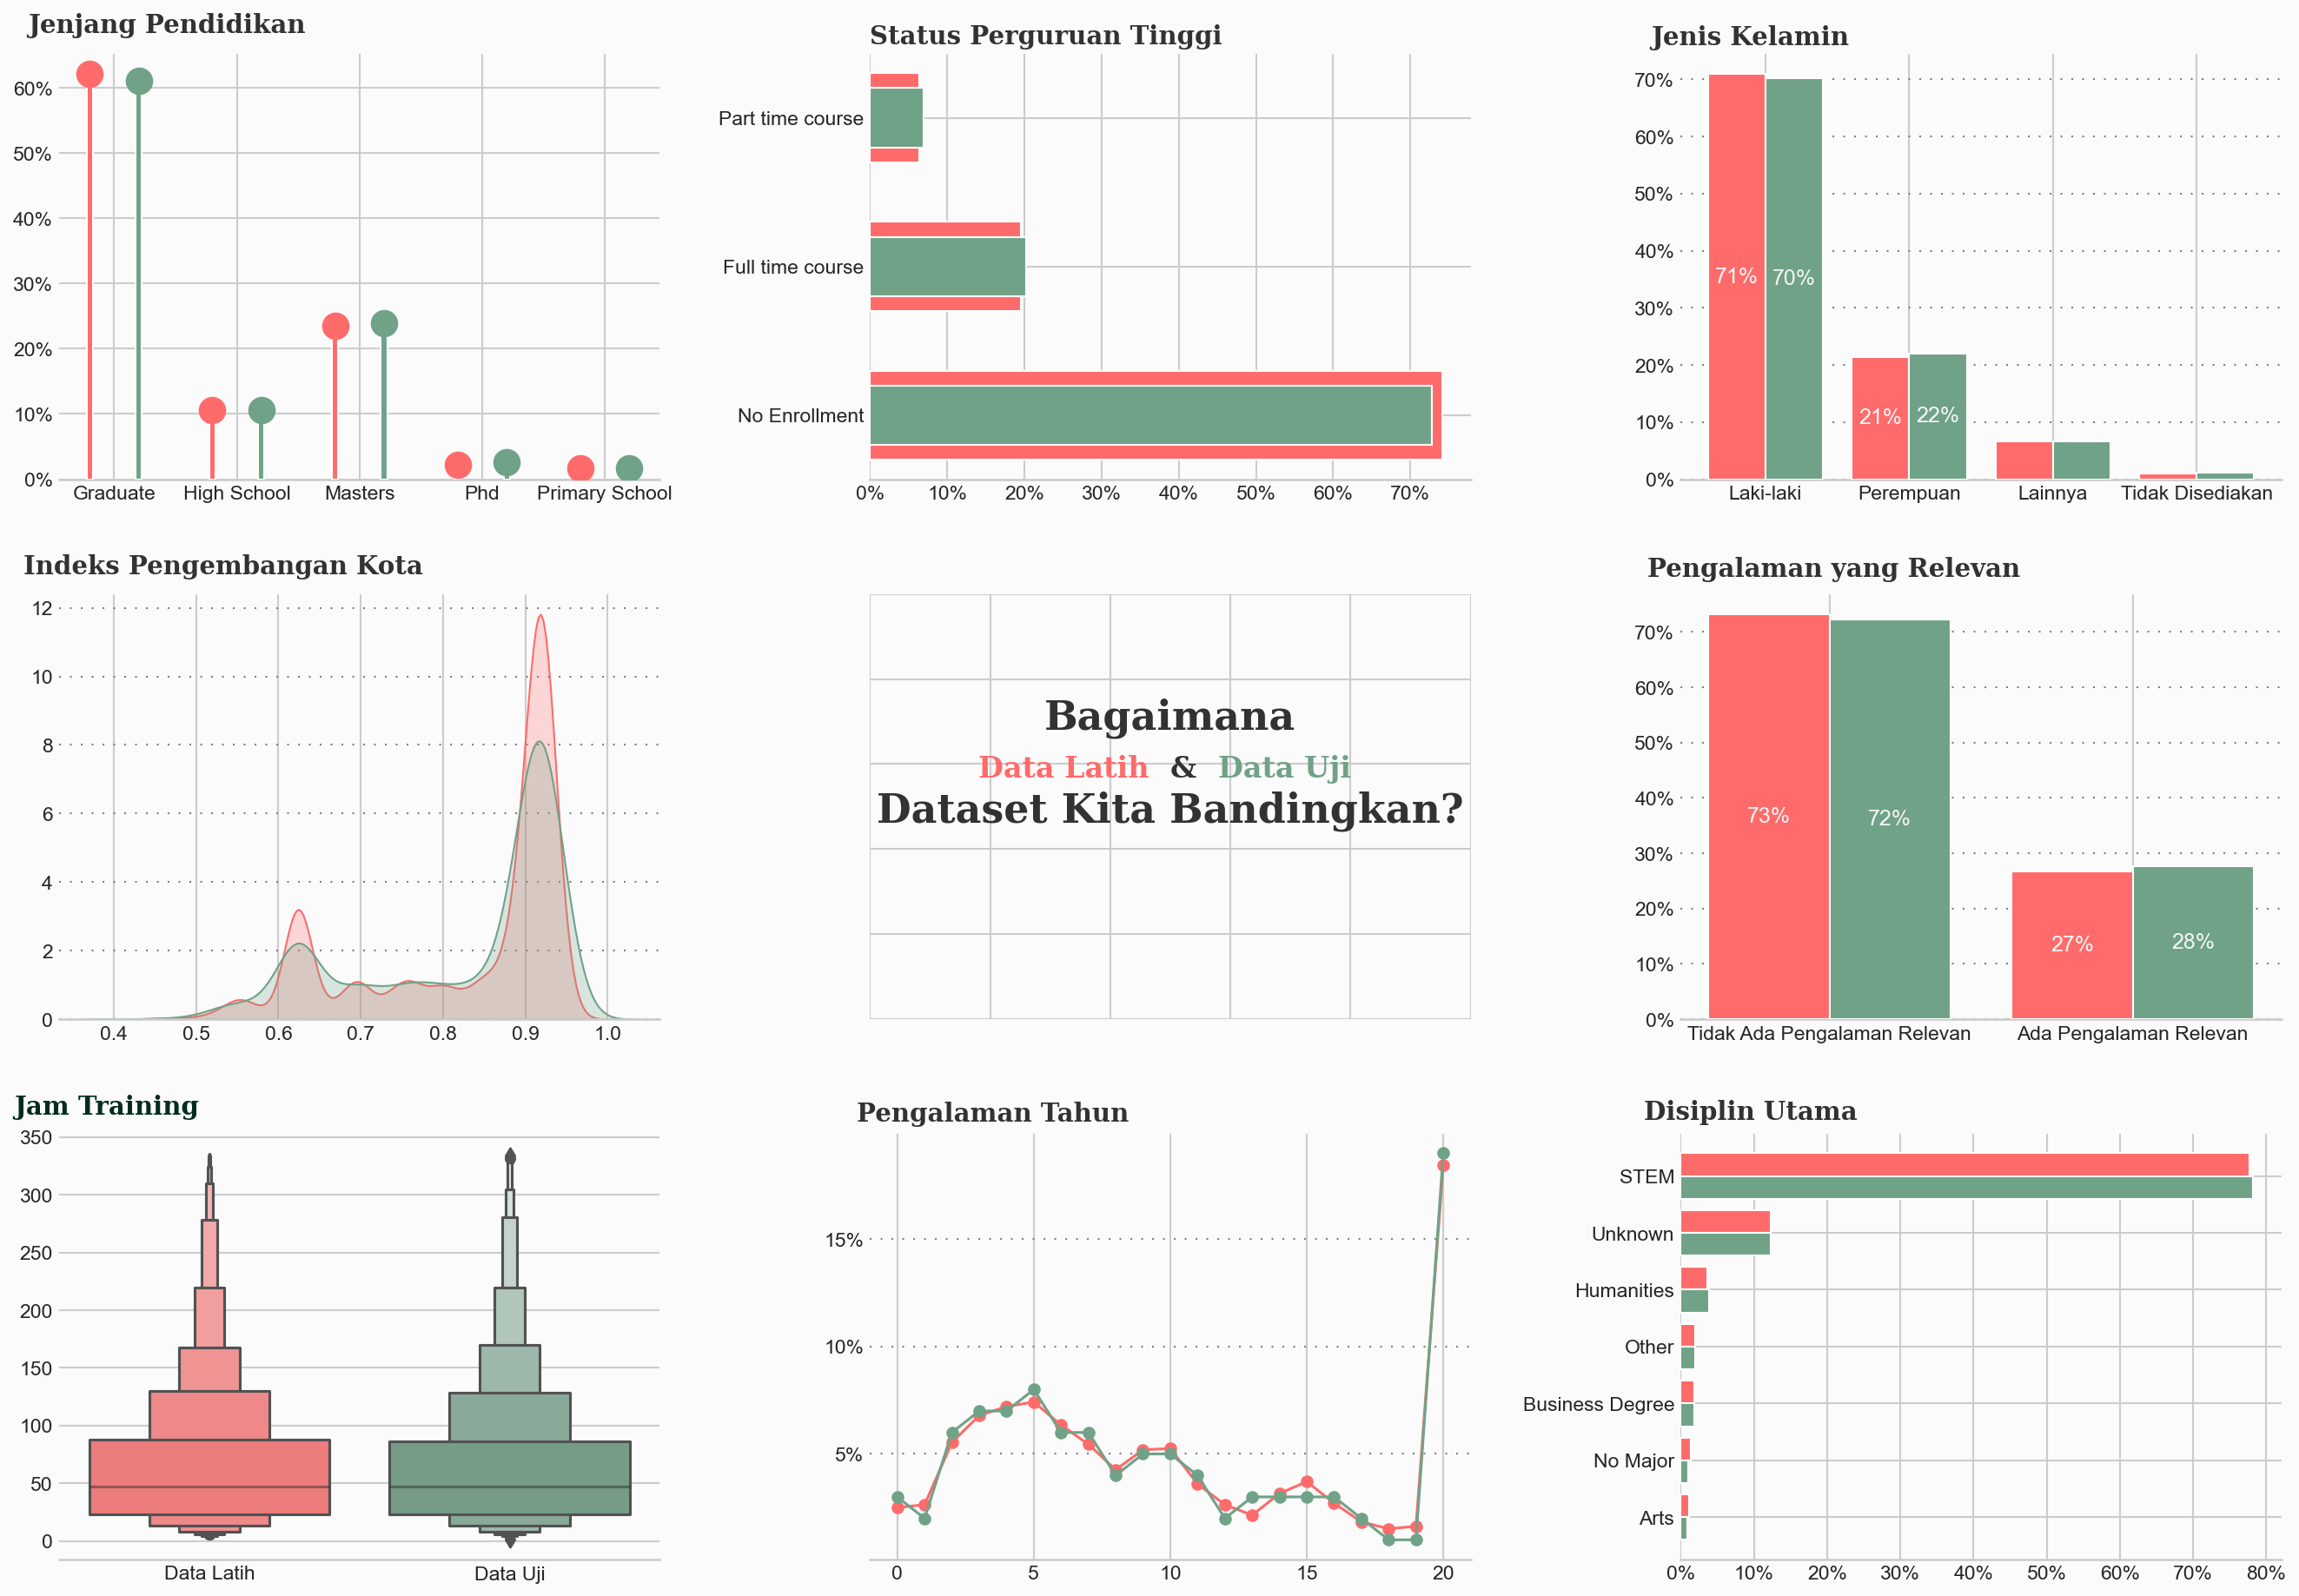

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Membuat palet warna
palette = ['#FF6B6B', '#70A288', '#4A7C59', '#4D6B50']

# Membuat gambar dan sumbu-sumbunya
background_color = "#fbfbfb"
fig = plt.figure(figsize=(22, 15), dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

# Ax0 - JENJANG PENDIDIKAN
train = pd.DataFrame(train_df["education_level"].value_counts())
train["Persentase"] = train["education_level"].apply(lambda x: x/sum(train["education_level"])*100)
train = train.sort_index()

test = pd.DataFrame(test_df["education_level"].value_counts())
test["Persentase"] = test["education_level"].apply(lambda x: x/sum(test["education_level"])*100)
test = test.sort_index()

ax0.bar(np.arange(len(train.index)), height=train["Persentase"], zorder=3, color=palette[0], width=0.05)
ax0.scatter(np.arange(len(train.index)), train["Persentase"], zorder=3, s=200, color=palette[0])
ax0.bar(np.arange(len(test.index))+0.4, height=test["Persentase"], zorder=3, color=palette[1], width=0.05)
ax0.scatter(np.arange(len(test.index))+0.4, test["Persentase"], zorder=3, s=200, color=palette[1])
ax0.text(-0.5, 68.5, 'Jenjang Pendidikan', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xticks(np.arange(len(train.index))+0.4 / 2)
ax0.set_xticklabels(list(train.index), rotation=0)

# Ax1 - STATUS PERGURUAN TINGGI
train = pd.DataFrame(train_df["enrolled_university"].value_counts())
train["Persentase"] = train["enrolled_university"].apply(lambda x: x/sum(train["enrolled_university"])*100).loc[enroll_order]
test = pd.DataFrame(test_df["enrolled_university"].value_counts())
test["Persentase"] = test["enrolled_university"].apply(lambda x: x/sum(test["enrolled_university"])*100).loc[enroll_order]

ax1.text(0, 2.5, 'Status Perguruan Tinggi', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(train.index, train['Persentase'], color=palette[0], zorder=3, height=0.6)
ax1.barh(test.index, test['Persentase'], color=palette[1], zorder=3, height=0.4)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

# Ax2 - JENIS KELAMIN
train = pd.DataFrame(train_df["gender"].value_counts())
train["Persentase"] = train["gender"].apply(lambda x: x/sum(train["gender"])*100)
test = pd.DataFrame(test_df["gender"].value_counts())
test["Persentase"] = test["gender"].apply(lambda x: x/sum(test["gender"])*100)

x = np.arange(len(train))
ax2.text(-0.6, 76, 'Jenis Kelamin', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
ax2.bar(x, height=train["Persentase"], zorder=3, color=palette[0], width=0.4)
ax2.bar(x+0.4, height=test["Persentase"], zorder=3, color=palette[1], width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Laki-laki', 'Perempuan', 'Lainnya', 'Tidak Disediakan'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i, j in zip([0, 1], train["Persentase"]):
    ax2.annotate(f'{j:0.0f}%', xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i, j in zip([0, 1], test["Persentase"]):
    ax2.annotate(f'{j:0.0f}%', xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

# Ax3 - INDEKS PENGEMBANGAN KOTA (CITY DEVELOPMENT INDEX)
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
train = pd.DataFrame(train_df["city_development_index"])
test = pd.DataFrame(test_df["city_development_index"])
sns.kdeplot(train["city_development_index"], ax=ax3, color=palette[0], shade=True, label="Data Latih")
sns.kdeplot(test["city_development_index"], ax=ax3, color=palette[1], shade=True, label="Data Uji")
ax3.text(0.29, 13, 'Indeks Pengembangan Kota', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax3.set_ylabel('')
ax3.set_xlabel('')

# Ax4 - JUDUL GRAFIK
ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'Bagaimana\n\nDataset Kita Bandingkan?', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")
ax4.text(0.18, 0.57, "Data Latih", fontweight="bold", fontfamily='serif', fontsize=16, color=palette[0])
ax4.text(0.5, 0.57, "&", fontweight="bold", fontfamily='serif', fontsize=16, color='#323232')
ax4.text(0.58, 0.57, "Data Uji", fontweight="bold", fontfamily='serif', fontsize=16, color=palette[1])

# Ax5 - PENGALAMAN YANG RELEVAN
train = pd.DataFrame(train_df["relevent_experience"].value_counts())
train["Persentase"] = train["relevent_experience"].apply(lambda x: x/sum(train["relevent_experience"])*100)
test = pd.DataFrame(test_df["relevent_experience"].value_counts())
test["Persentase"] = test["relevent_experience"].apply(lambda x: x/sum(test["relevent_experience"])*100)
x = np.arange(len(train))
ax5.text(-0.4, 80, 'Pengalaman yang Relevan', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
ax5.bar(x, height=train["Persentase"], zorder=3, color=palette[0], width=0.4)
ax5.bar(x+0.4, height=test["Persentase"], zorder=3, color=palette[1], width=0.4)
ax5.set_xticks(x + 0.4 / 2)
ax5.set_xticklabels(['Tidak Ada Pengalaman Relevan', 'Ada Pengalaman Relevan'])
ax5.yaxis.set_major_formatter(mtick.PercentFormatter())
ax5.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i, j in zip([0, 1, 2], train["Persentase"]):
    ax5.annotate(f'{j:0.0f}%', xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i, j in zip([0, 1, 2], test["Persentase"]):
    ax5.annotate(f'{j:0.0f}%', xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

# Ax6 - JAM TRAINING
train = pd.DataFrame(train_df["training_hours"])
train["TrainTest"] = "Data Latih"
test = pd.DataFrame(test_df["training_hours"])
test["TrainTest"] = "Data Uji"
ax6.text(-0.65, 370, 'Jam Training', fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")
comb_graph_temp_df = pd.concat([train, test], axis=0)
sns.boxenplot(ax=ax6, y="training_hours", x="TrainTest", data=comb_graph_temp_df, palette=palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Ax7 - PENGALAMAN TAHUN
train = pd.DataFrame(train_df["experience"].value_counts())
train["Persentase"] = train["experience"].apply(lambda x: x/sum(train["experience"])*100)
train = train.sort_index()
test = pd.DataFrame(test_df["experience"].value_counts())
test["Persentase"] = round(test["experience"].apply(lambda x: x/sum(test["experience"])*100),).astype(int)
test = test.sort_index()
ax7.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
ax7.plot(train.index, train["Persentase"], zorder=3, color=palette[0], marker='o')
ax7.plot(test.index, test["Persentase"], zorder=3, color=palette[1], marker='o')
ax7.text(-1.5, 20.5, 'Pengalaman Tahun', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax7.set_yticklabels(labels=['0   ', '5%', '10%', '15%'])
ax7.xaxis.set_major_locator(mtick.MultipleLocator(5))
ax7.yaxis.set_major_locator(mtick.MultipleLocator(5))

# Ax8 - DISIPLIN UTAMA
train = pd.DataFrame(train_df["major_discipline"].value_counts())
train["Persentase"] = train["major_discipline"].apply(lambda x: x/sum(train["major_discipline"])*100)
test = pd.DataFrame(test_df["major_discipline"].value_counts())
test["Persentase"] = test["major_discipline"].apply(lambda x: x/sum(test["major_discipline"])*100)

ax8.barh(np.arange(len(train.index)), train["Persentase"], zorder=3, color=palette[0], height=0.4)
ax8.barh(np.arange(len(test.index))+0.4, test["Persentase"], zorder=3, color=palette[1], height=0.4)
ax8.text(-5, -0.8, 'Disiplin Utama', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.xaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax8.set_yticks(np.arange(len(test.index))+0.4 / 2)
ax8.set_yticklabels(list(test.index))
ax8.invert_yaxis()

for i in range(0, 9):
    locals()["ax"+str(i)].set_facecolor(background_color)

for i in range(0, 9):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)

for s in ["top", "right", "left"]:
    for i in range(0, 9):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6624\597219328.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df["city_development_index"], color="#6B4226", shade=True, ax=ax2, zorder=3)


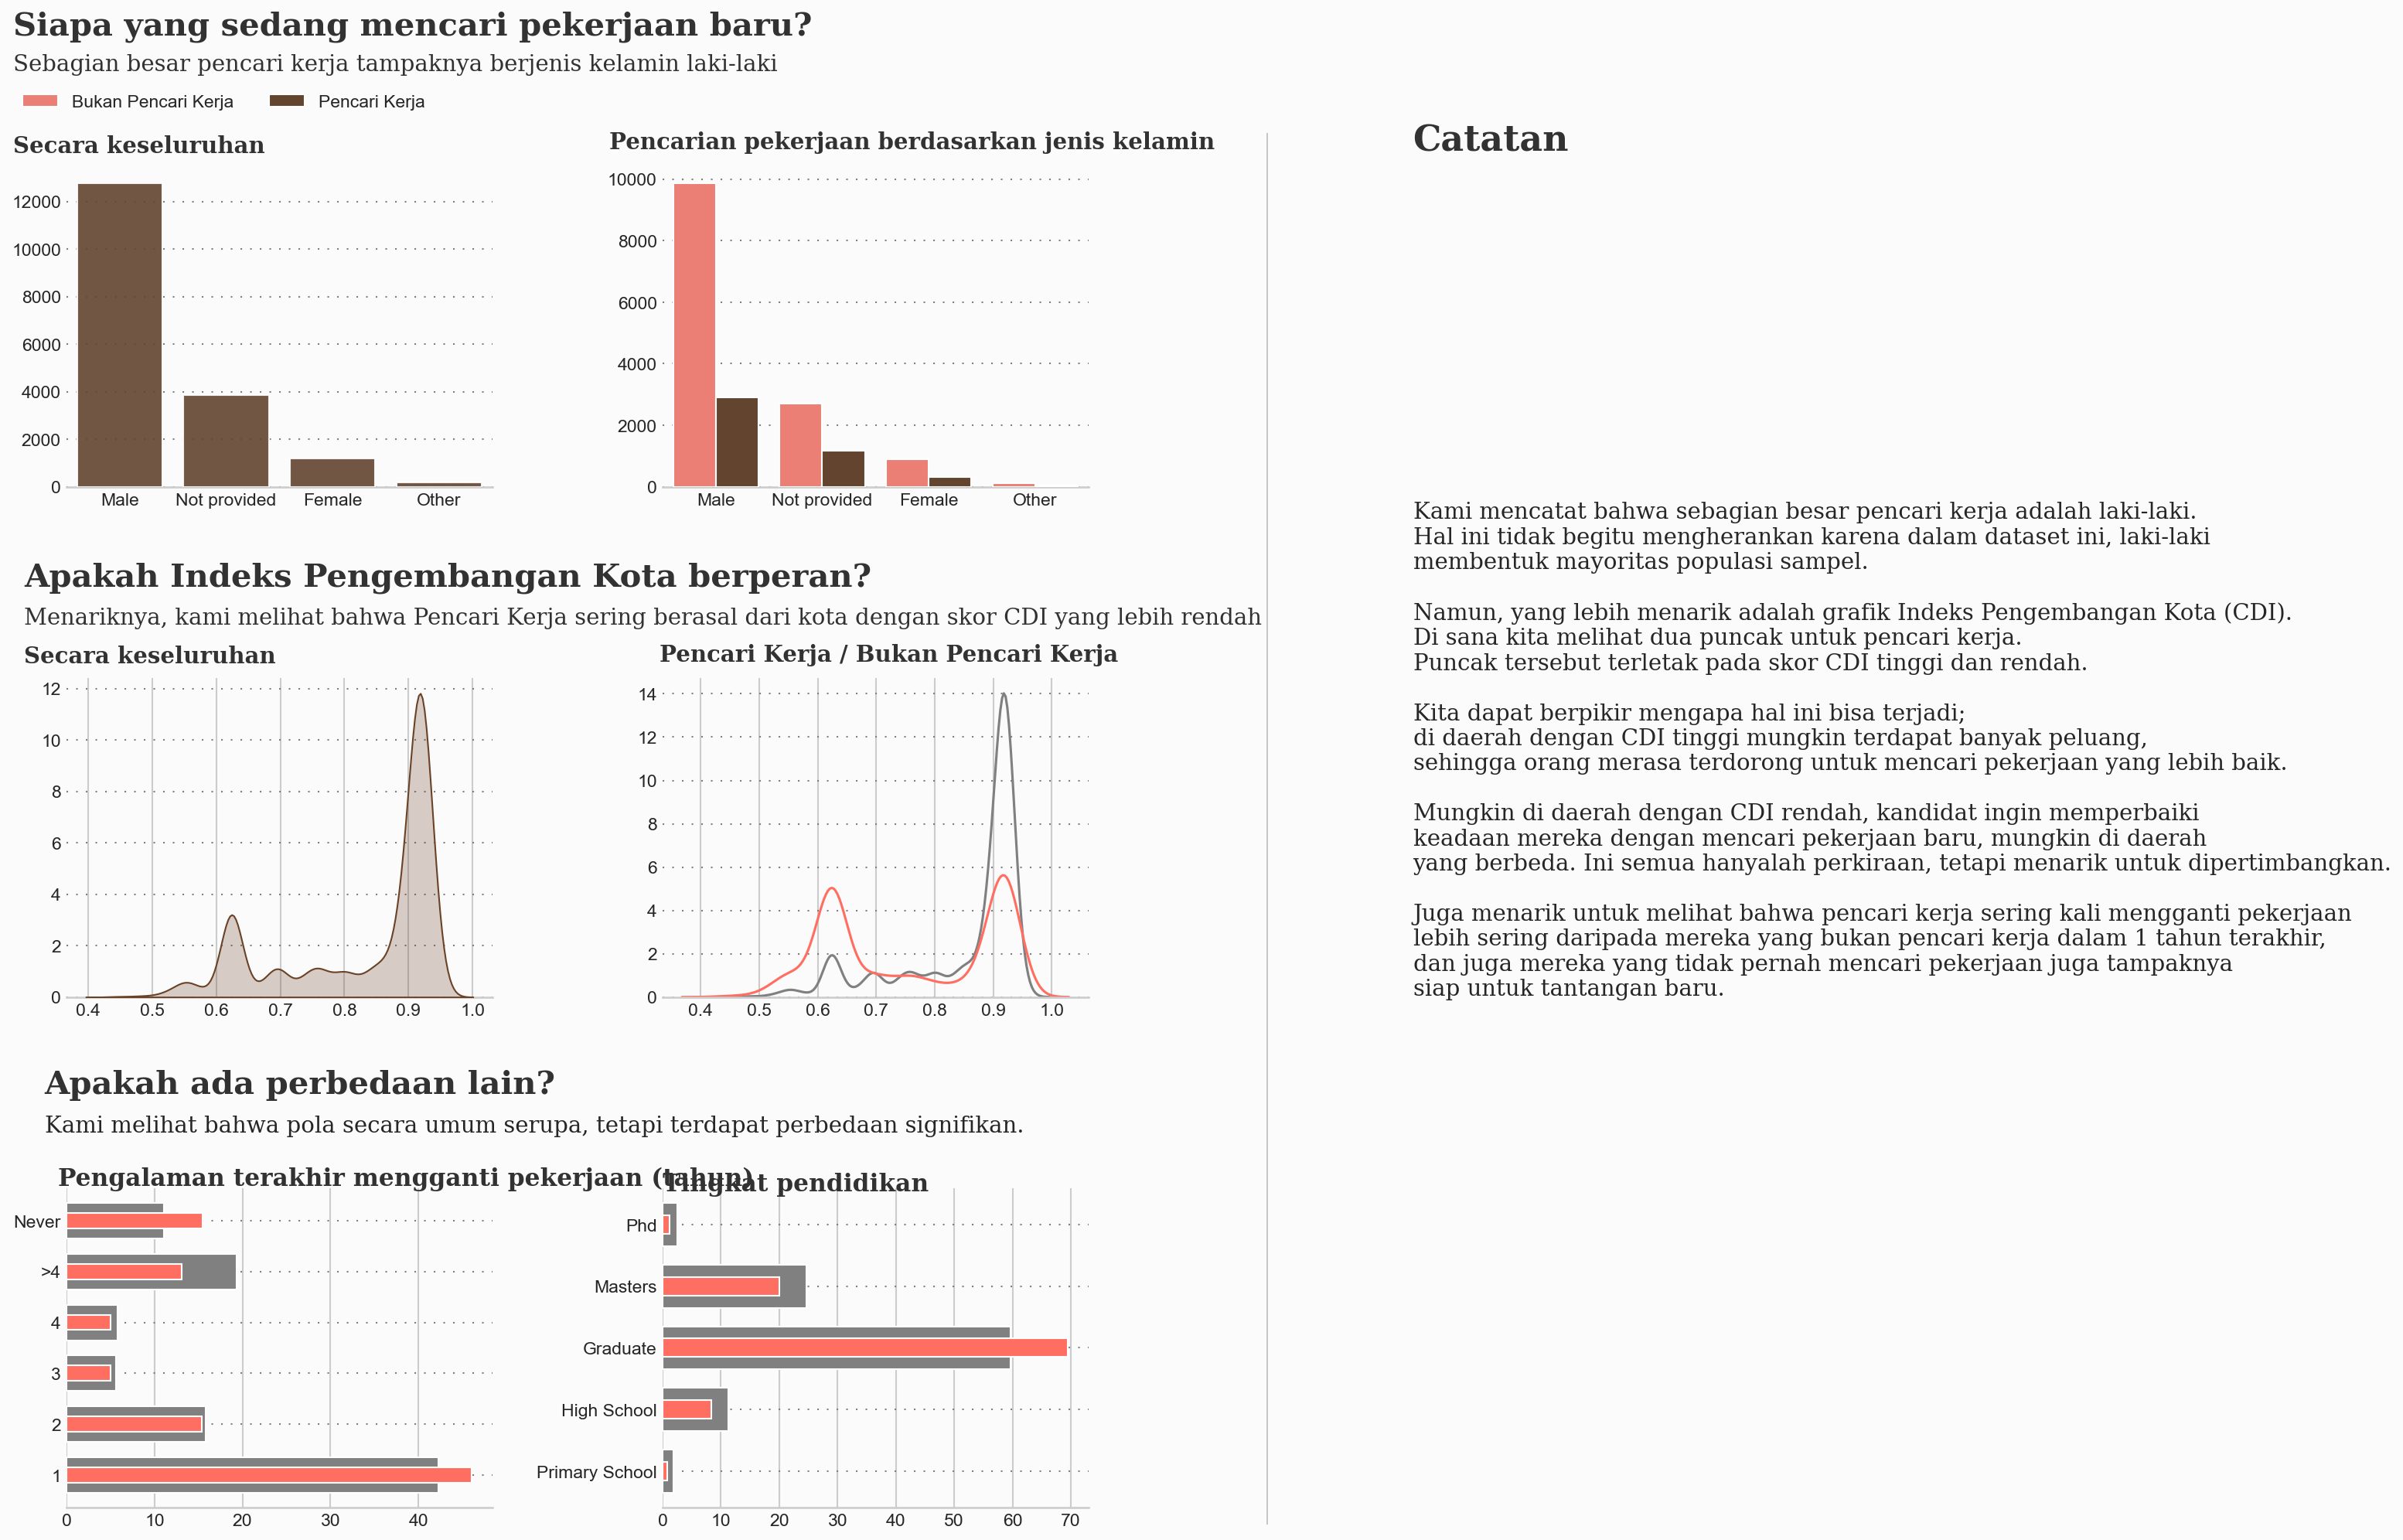

In [59]:
color_palette = ["#FF6F61", "#6B4226"]
fig = plt.figure(figsize=(18, 15), dpi=150)
fig.patch.set_facecolor(background_color)  # Warna latar belakang gambar
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# Distribusi
ax0.text(-1, 19000, 'Siapa yang sedang mencari pekerjaan baru?', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-1, 17500, 'Sebagian besar pencari kerja tampaknya berjenis kelamin laki-laki', fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-1, 14050, 'Secara keseluruhan', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x=train_df["gender"], color="#6B4226", ax=ax0, zorder=3, alpha=0.9)

# Gender
ax1.text(-1, 11000, 'Pencarian pekerjaan berdasarkan jenis kelamin', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x="gender", hue="target", data=train_df, palette=color_palette, ax=ax1, zorder=3)
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Bukan Pencari Kerja", "Pencari Kerja"], ncol=2, bbox_to_anchor=(-0.52, 1.28), facecolor=background_color, edgecolor=background_color)

# CDI
ax2.text(0.3, 16, 'Apakah Indeks Pengembangan Kota berperan?', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax2.text(0.3, 14.5, 'Menariknya, kami melihat bahwa Pencari Kerja sering berasal dari kota dengan skor CDI yang lebih rendah', fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax2.text(0.3, 13, 'Secara keseluruhan', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(train_df["city_development_index"], color="#6B4226", shade=True, ax=ax2, zorder=3)

ax3.text(0.33, 15.5, 'Pencari Kerja / Bukan Pencari Kerja', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(train_df.loc[(train_df["target"] == 0), "city_development_index"], color="gray", label="Tidak Selamat", ax=ax3)
sns.kdeplot(train_df.loc[(train_df["target"] == 1), "city_development_index"], color="#FF6F61", label="Selamat", ax=ax3)

# Perubahan pekerjaan terakhir (yrs)
ax4.barh(notseek_job_change.index, notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax4.barh(seek_job_change.index, seek_job_change['percentage'], color="#FF6F61", zorder=3, height=0.3)
ax4.xaxis.set_major_locator(mtick.MultipleLocator(10))

ax5.barh(ed_notseek_job_change.index, ed_notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax5.barh(ed_seek_job_change.index, ed_seek_job_change['percentage'], color="#FF6F61", zorder=3, height=0.3)
ax5.xaxis.set_major_locator(mtick.MultipleLocator(10))

ax4.text(-1, 5.7, 'Pengalaman terakhir mengganti pekerjaan (tahun)', fontsize=15, fontweight='bold', fontfamily='serif', color='#323232')
ax5.text(0, 4.55, 'Tingkat pendidikan', fontsize=15, fontweight='bold', fontfamily='serif', color='#323232')

ax4.text(-2.5, 7.5, 'Apakah ada perbedaan lain?', 
         fontsize=20, fontweight='bold', fontfamily='serif',color='#323232')

ax4.text(-2.5, 6.75, 
         'Kami melihat bahwa pola secara umum serupa, tetapi terdapat perbedaan signifikan.', 
         fontsize=14, fontweight='light', fontfamily='serif')

fig.text(0.77, 0.89, 'Catatan', fontsize=22, fontweight='bold', fontfamily='serif',color='#323232')

fig.text(0.77, 0.39, '''
Kami mencatat bahwa sebagian besar pencari kerja adalah laki-laki.
Hal ini tidak begitu mengherankan karena dalam dataset ini, laki-laki
membentuk mayoritas populasi sampel.

Namun, yang lebih menarik adalah grafik Indeks Pengembangan Kota (CDI).
Di sana kita melihat dua puncak untuk pencari kerja.
Puncak tersebut terletak pada skor CDI tinggi dan rendah.

Kita dapat berpikir mengapa hal ini bisa terjadi; 
di daerah dengan CDI tinggi mungkin terdapat banyak peluang, 
sehingga orang merasa terdorong untuk mencari pekerjaan yang lebih baik.

Mungkin di daerah dengan CDI rendah, kandidat ingin memperbaiki 
keadaan mereka dengan mencari pekerjaan baru, mungkin di daerah 
yang berbeda. Ini semua hanyalah perkiraan, tetapi menarik untuk dipertimbangkan.

Juga menarik untuk melihat bahwa pencari kerja sering kali mengganti pekerjaan
lebih sering daripada mereka yang bukan pencari kerja dalam 1 tahun terakhir,
dan juga mereka yang tidak pernah mencari pekerjaan juga tampaknya
siap untuk tantangan baru.
'''
         , fontsize=14, fontweight='light', fontfamily='serif')

import matplotlib.lines as lines
l1 = lines.Line2D([0.7, 0.7], [0.1, 0.9], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

for s in ["top", "right", "left"]:
    for i in range(0, 6):
        locals()["ax"+str(i)].spines[s].set_visible(False)

for i in range(0, 6):
    locals()["ax"+str(i)].set_facecolor(background_color)
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    locals()["ax"+str(i)].grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))

for x in range(0, 4):
    for y in range(0, 4):
        locals()["ax"+str(x)].set_xlabel("")
        locals()["ax"+str(y)].set_ylabel("")

plt.show()


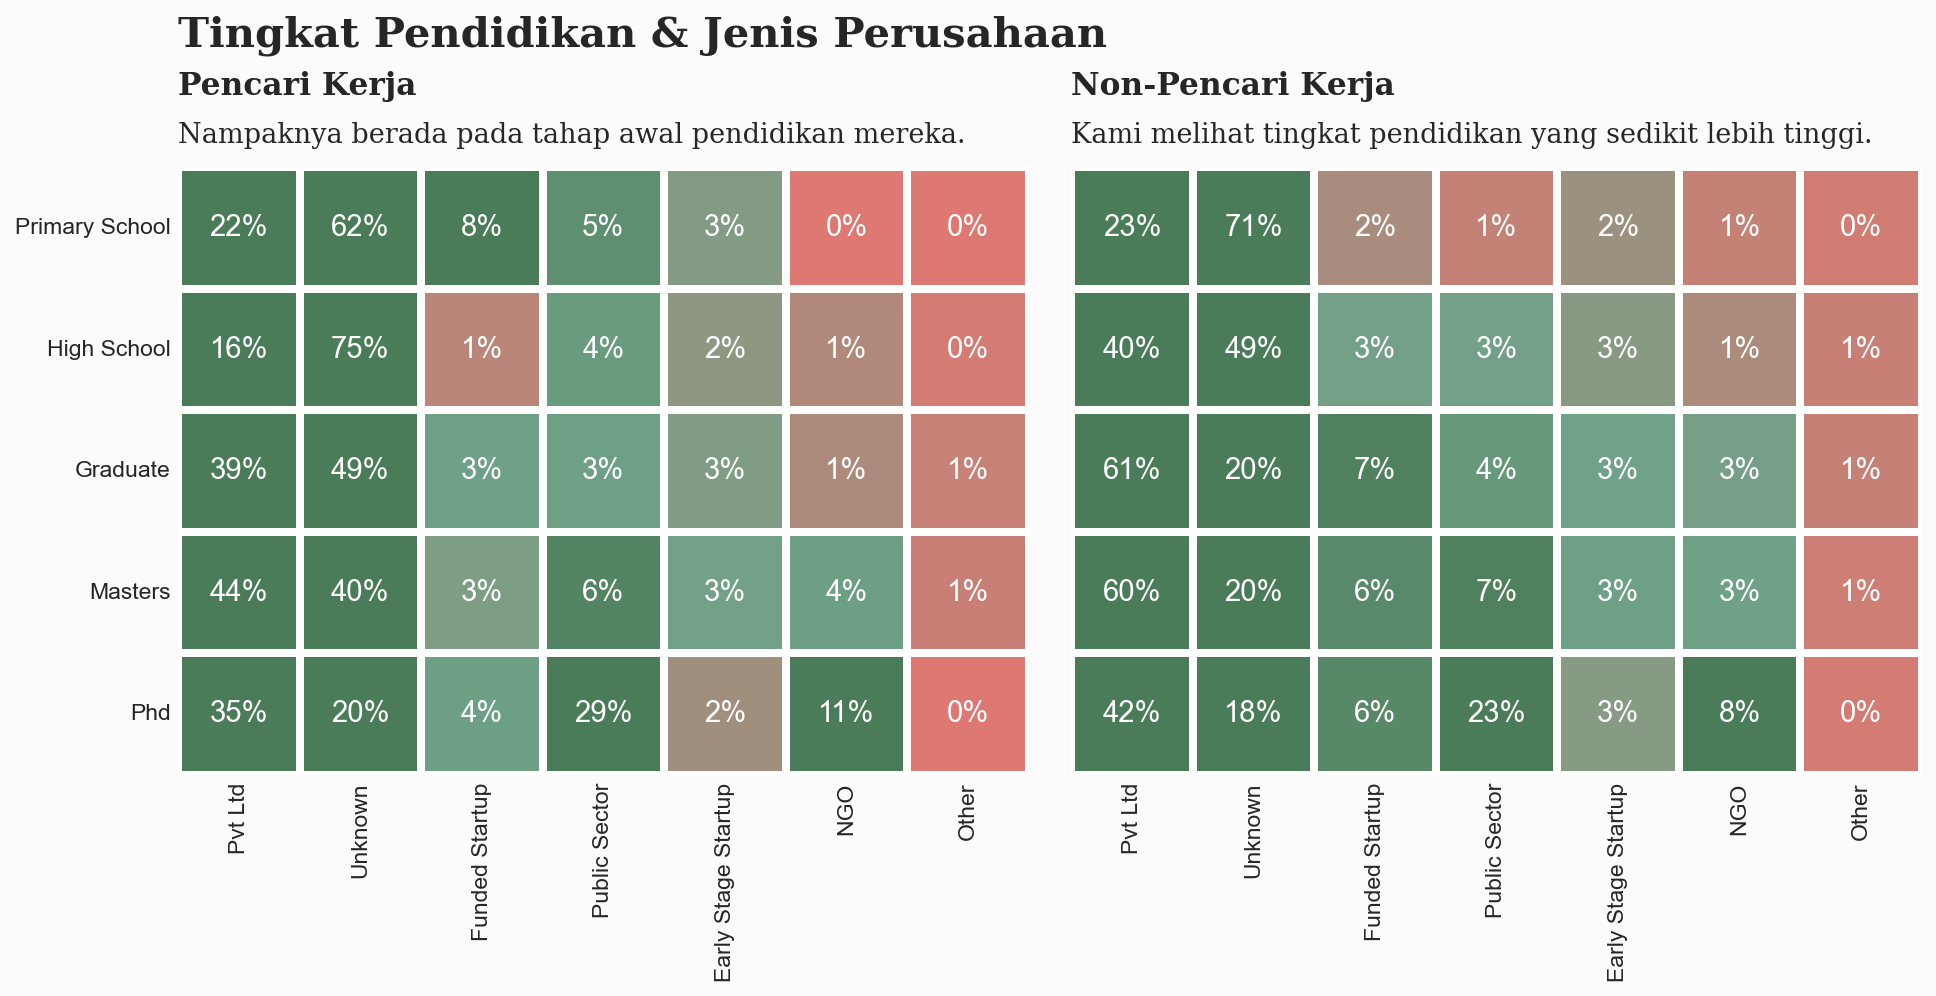

In [71]:
colors = ['#FF6B6B', '#70A288', '#4A7C59']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig = plt.figure(figsize=(14, 14), dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=0.3)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])

sns.heatmap(
    ax=ax0,
    data=job_seek,
    linewidths=0.1,
    vmin=0,
    vmax=0.075,
    square=True,
    cbar_kws={"orientation": "horizontal"},
    cbar=False,
    cmap=colormap,
    linewidth=3,
    annot=False,
    fmt='1.0%',
    annot_kws={"fontsize": 14}
)

sns.heatmap(
    ax=ax1,
    data=no_seek,
    linewidths=0.1,
    vmin=0,
    vmax=0.075,
    square=True,
    cbar_kws={"orientation": "horizontal"},
    cbar=False,
    cmap=colormap,
    linewidth=3,
    annot=False,
    fmt='1.0%',
    annot_kws={"fontsize": 14}
)

ax0.set_facecolor(background_color)
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)

ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("Pengalaman Karyawan [Tahun]", fontfamily='serif', fontsize=14, loc='left')
ax1.set_ylabel("")

for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

ax0.text(0, -1.3,
         'Pencari Kerja: Ukuran Perusahaan & Pengalaman Karyawan',
         fontsize=20,
         fontweight='bold',
         fontfamily='serif'
)

ax1.text(0, -0.7,
         'Mereka dengan pengalaman lebih dari 20 tahun mendominasi angkatan kerja di semua ukuran perusahaan.',
         fontsize=13,
         fontweight='light',
         fontfamily='serif'
)
ax1.text(0, -0.35,
         'Orang dengan pengalaman lebih dari 20 tahun tidak mencari peran baru; mungkin mereka berada pada tingkat senior yang diinginkan.',
         fontsize=13,
         fontweight='light',
         fontfamily='serif'
)

ax1.text(0, -1.3,
         'Non-Pencari Kerja: Ukuran Perusahaan & Pengalaman Karyawan',
         fontsize=20,
         fontweight='bold',
         fontfamily='serif'
)

ax0.text(0, -0.7,
         'Kami melihat bahwa sebagian besar pencari kerja memiliki pengalaman antara 2 hingga 6 tahun.',
         fontsize=13,
         fontweight='light',
         fontfamily='serif'
)
ax0.text(0, -0.35,
         'Secara anekdot, ini terlihat benar; orang membangun keterampilan mereka dalam beberapa tahun pertama karier mereka lalu mencari tantangan baru.',
         fontsize=13,
         fontweight='light',
         fontfamily='serif'
)

ax0.tick_params(axis='both', which='both', length=0)
ax1.tick_params(axis='both', which='both', length=0)

plt.show()
